# Coil-globule transition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def fit_fn(x,a,b):
    return a*x**b

## Different temperatures

In [25]:
path="/work/cms16/sb95/SAW_coil_globule"
Rg={}
for val1 in os.listdir(path):
    if 'epsilon_' in val1:
        chi = float(val1.split("epsilon_")[-1])
        if chi not in list(Rg.keys()):
                Rg[chi] = {}
        for val2 in os.listdir(os.path.join(path, val1)):
            temp = float(val2.split('temp_')[-1])
            if temp not in list(Rg[chi].keys()):
                    Rg[chi][temp] = [[],[]]
                    
            for val3 in sorted(os.listdir(os.path.join(path, val1, val2)), key=lambda x: float(x.split('N_')[-1])):
                N = float(val3.split('N_')[-1])
                
                rgval=[]
                for val4 in os.listdir(os.path.join(path, val1, val2, val3)):
                    if 'energy_report' in val4:
                        # print(val1,val2,val3,val4)
                        try:
                            rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1, usecols=[2]).mean()
                            if rg>800: continue
                            rgval.append(rg)
                        except(): pass
                Rg[chi][temp][0].append(N)
                Rg[chi][temp][1].append(np.mean(rgval))
                # print(chi, temp, N, np.mean(rgval))

print(Rg[1.0].keys())    

dict_keys([60.0, 660.0, 900.0, 420.0, 180.0, 540.0, 780.0, 300.0])


[0.49433984 0.32822124] 3.701867856606148e-07 0.0006084297705245979
[0.65430167 0.30455603] 1.4192209368697325e-05 0.0037672548850187088
[1.2506133  0.23737816] 0.00022454914110214643 0.01498496383386181
[2.16469434 0.24215902] 0.002639486885627363 0.051375936834547
[0.46045066 0.55894905] 1.4524022270349966e-05 0.003811039526211971
[0.33086275 0.62392231] 0.0004176921109237053 0.020437517239716405
[0.26877551 0.66496639] 0.0010651772877477066 0.03263705390729541
[0.34571129 0.63567444] 7.698317548277274e-05 0.008774005669178289


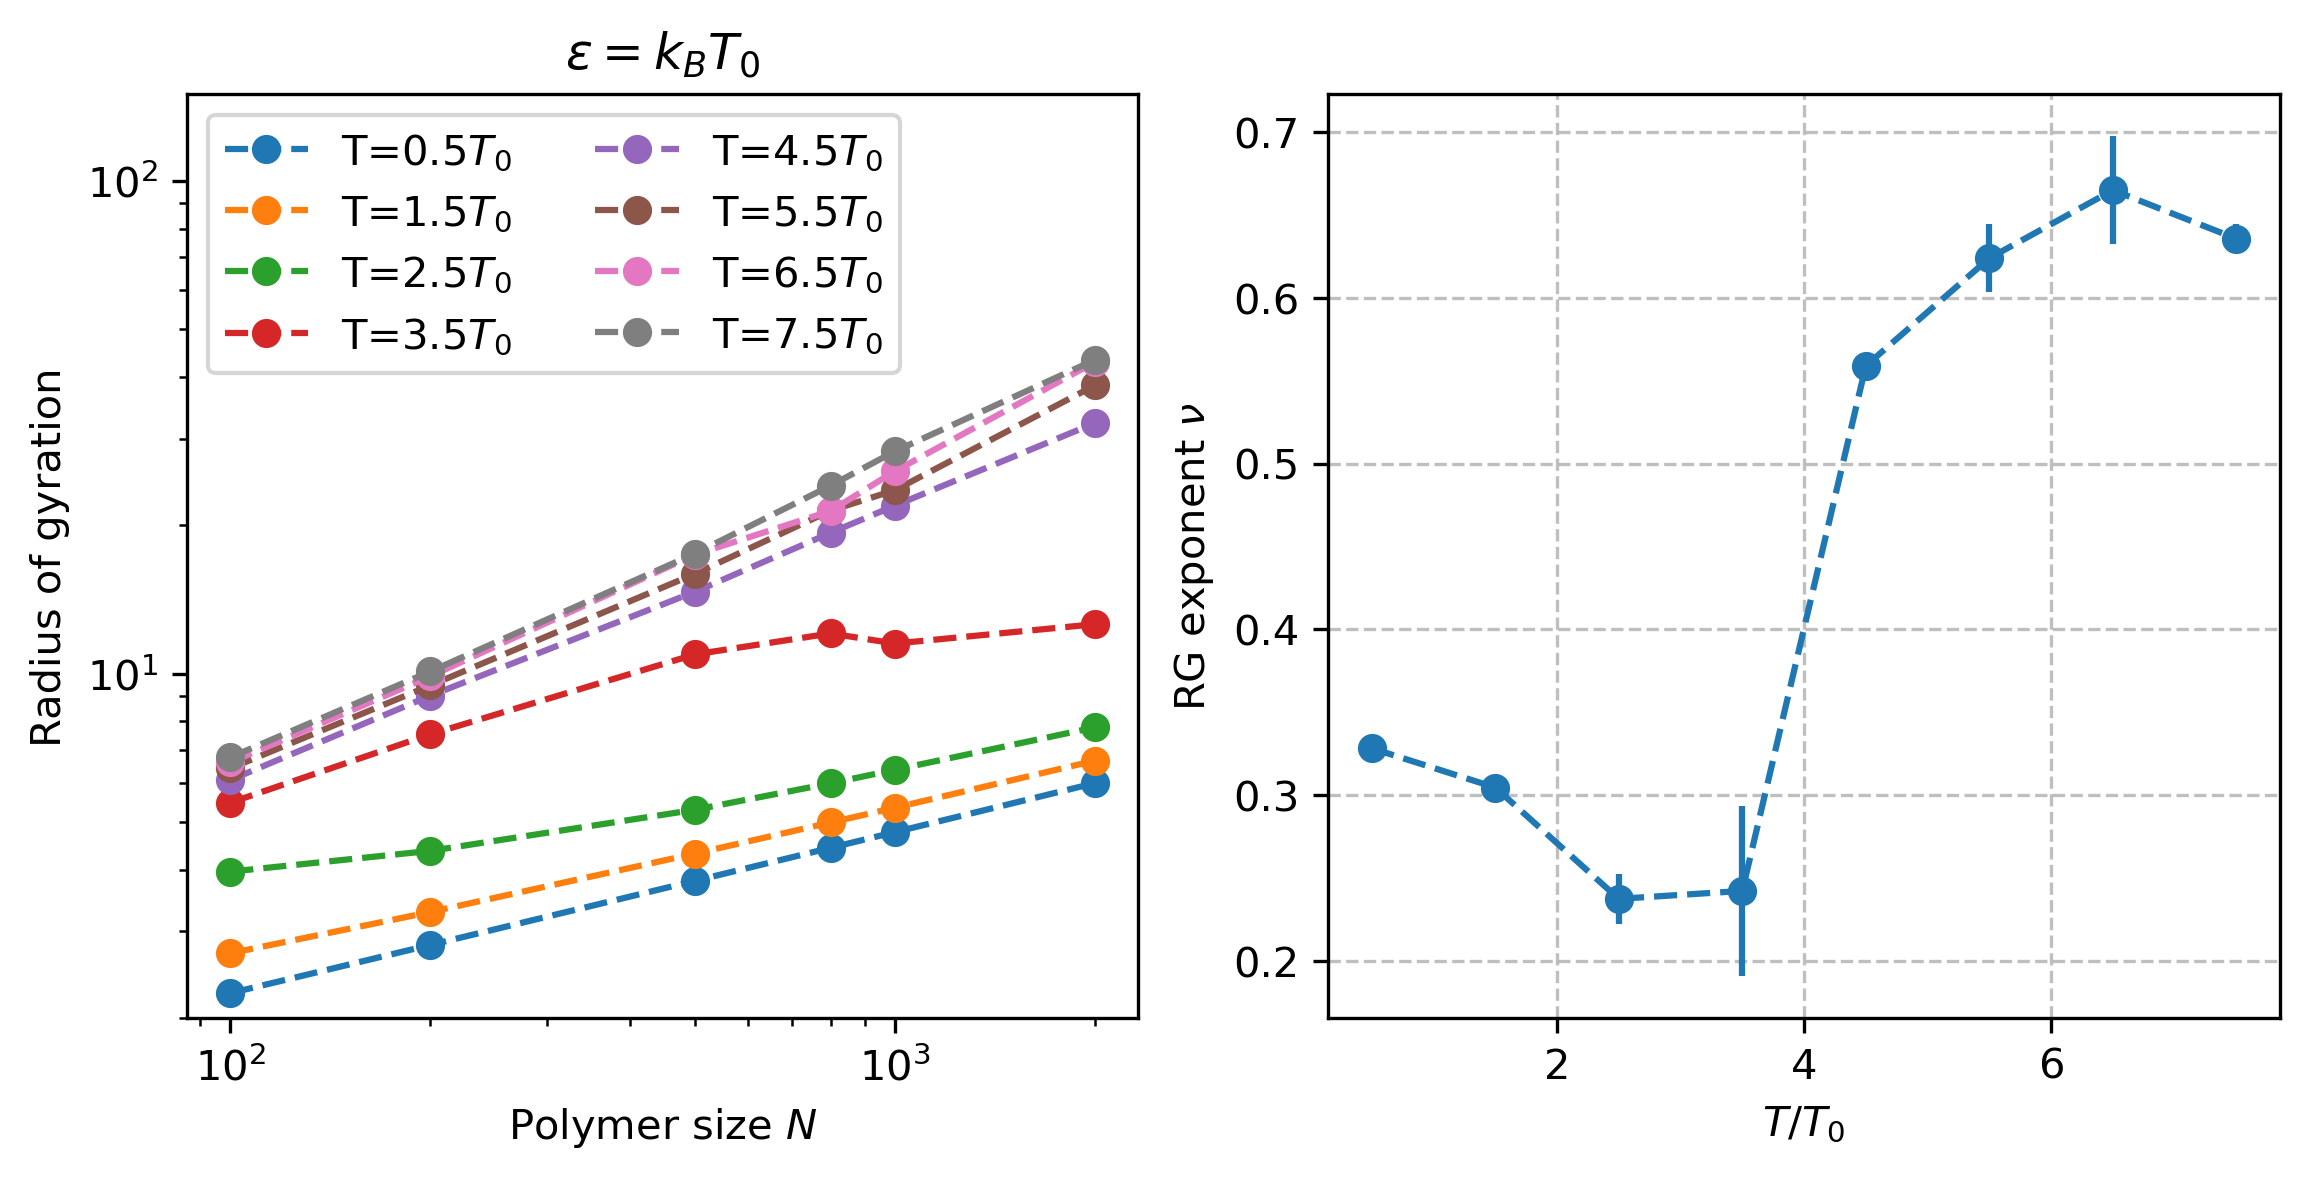

In [10]:
chi=1.0
Nvals = np.logspace(1.5,3.5,10)
fig, ax = plt.subplots(1,2, figsize=(9,4), dpi=300)
nu={0.0:[[],[]]}
temp=[]
for T in sorted(Rg[chi].keys()):
    ax[0].loglog(np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1],'o--', label=f"T={T/120.0:.1f}$T_0$")
    ax[0].set_title("$\\epsilon=k_BT_0$")
    popt,pcov = curve_fit(fit_fn,np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1])
    print(popt,pcov[1][1], np.sqrt(pcov[1,1]))
    nu[0.0][0].append(popt[1])
    nu[0.0][1].append(np.sqrt(pcov[1,1]))
    temp.append(T)

ax[0].legend(ncols=2)
ax[0].set_ylim(2,150)
ax[0].set_ylabel("Radius of gyration")
ax[0].set_xlabel("Polymer size $N$")
ax[1].errorbar(np.array(temp)/120.0, nu[0.0][0], yerr=nu[0.0][1], fmt='o--')
ax[1].set_xlabel("$T/T_0$")
ax[1].set_ylabel("RG exponent $\\nu$")
ax[1].grid(alpha=0.8, which='both', ls='--')
# ax[1].set_ylim(0.,1)


In [359]:
path="/work/cms16/sb95/SAW_stiff_coil_globule_k30.0"
Rg={}
for val1 in os.listdir(path):
    if 'epsilon_' in val1:
        chi = float(val1.split("epsilon_")[-1])
        if chi not in list(Rg.keys()):
                Rg[chi] = {}
        for val2 in os.listdir(os.path.join(path, val1)):
            temp = float(val2.split('temp_')[-1])
            if temp not in list(Rg[chi].keys()):
                    Rg[chi][temp] = [[],[]]
                    
            for val3 in sorted(os.listdir(os.path.join(path, val1, val2)), key=lambda x: float(x.split('N_')[-1])):
                N = float(val3.split('N_')[-1])
                
                rgval=[]
                for val4 in os.listdir(os.path.join(path, val1, val2, val3)):
                    if 'energy_report' in val4:
                        # print(val1,val2,val3,val4)
                        try:
                            rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1, usecols=[2]).mean()
                            if rg>800: continue
                            rgval.append(rg)
                        except(): pass
                Rg[chi][temp][0].append(N)
                Rg[chi][temp][1].append(np.mean(rgval))
                # print(chi, temp, N, np.mean(rgval))

print(Rg.keys())    

dict_keys([1.0])


[54.90285983 -0.21656626] 0.005469056878931703 0.07395307213991656
[33.02921507 -0.17397083] 0.001566440427303281 0.039578282268224844
[11.99782507  0.1374194 ] 0.010461572357442599 0.10228182809005028
[3.20972852 0.37009358] 0.0016757824200654312 0.04093632152582143
[2.96425615 0.3771957 ] 0.0031053892749889913 0.05572601973036466
[2.30695994 0.41439009] 0.001439723964130357 0.03794369465577064
[1.55392461 0.47538659] 0.0007114936711475357 0.026673838702885186
[1.02945963 0.52786598] 0.00020006998470661335 0.014144609740343258


Text(0.5, 1.0, 'k=30.0 $k_BT_0/\\sigma$')

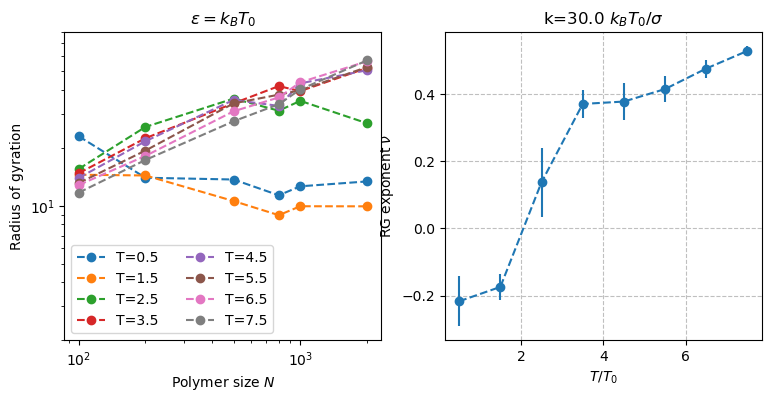

In [ ]:
chi=1.0
Nvals = np.logspace(1.5,3.5,10)
fig, ax = plt.subplots(1,2, figsize=(9,4), dpi=300)
k=30.0
nu[k]=[[],[]]
temp=[]
for T in sorted(Rg[chi].keys()):
    ax[0].loglog(np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1],'o--', label=f"T={T/120.0:.1f}")
    ax[0].set_title("$\\epsilon=k_BT_0$")
    popt,pcov = curve_fit(fit_fn,np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1])
    print(popt,pcov[1][1], np.sqrt(pcov[1,1]))
    nu[k][0].append(popt[1])
    nu[k][1].append(np.sqrt(pcov[1,1]))
    temp.append(T)

ax[0].legend(ncols=2)
ax[0].set_ylim(2,80)
ax[0].set_ylabel("Radius of gyration")
ax[0].set_xlabel("Polymer size $N$")
ax[1].errorbar(np.array(temp)/120.0, nu[k][0], yerr=nu[k][1], fmt='o--')
ax[1].set_xlabel("$T/T_0$")
ax[1].set_ylabel("RG exponent $\\nu$")
ax[1].grid(alpha=0.8, which='both', ls='--')
ax[1].set_title(f"k={k} $k_BT_0/\\sigma$")

# ax[1].set_ylim(0.,1)


Text(0, 0.5, 'RG exponent $\\nu$')

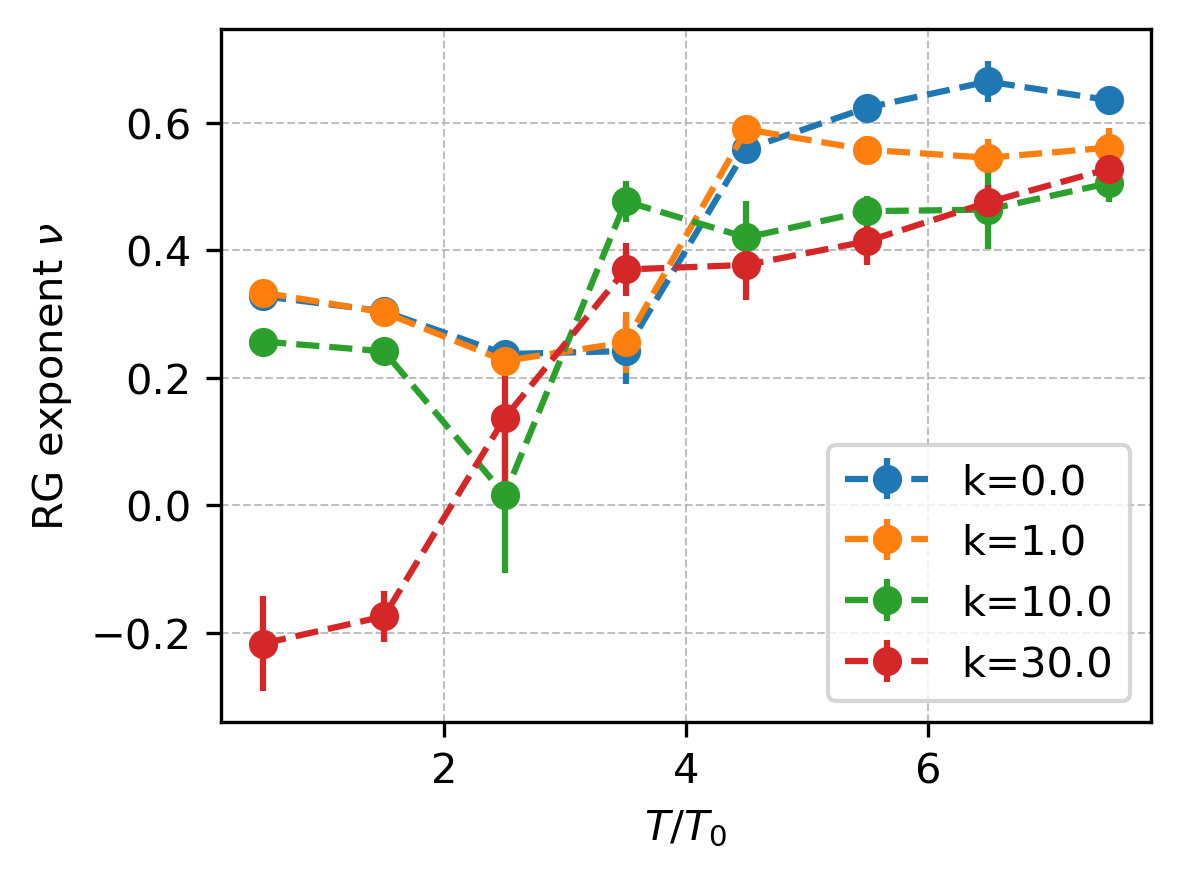

In [367]:
fig, ax = plt.subplots(1,1, figsize=(4,3), dpi=300)

for k in nu.keys():
    ax.errorbar(np.array(temp)/120.0, nu[k][0], yerr=nu[k][1], fmt='o--', label=f'k={k}')
    
ax.legend()
ax.grid(alpha=0.8, which='both', ls='--', lw=0.5)
ax.set_xlabel("$T/T_0$")
ax.set_ylabel("RG exponent $\\nu$")

## Different epsilon

In [19]:
path="/work/cms16/sb95/SAW_coil_globule_fixed_temp"
Rg={}
for val1 in os.listdir(path):
    if 'epsilon_' in val1:
        chi = float(val1.split("epsilon_")[-1])
        if chi<0.1: continue
        if chi not in list(Rg.keys()):
                Rg[chi] = {}
        for val2 in os.listdir(os.path.join(path, val1)):
            temp = float(val2.split('temp_')[-1])
            if temp not in list(Rg[chi].keys()):
                    Rg[chi][temp] = [[],[]]
                    
            for val3 in sorted(os.listdir(os.path.join(path, val1, val2)), key=lambda x: float(x.split('N_')[-1])):
                N = float(val3.split('N_')[-1])
                if N==2000: continue
                rgval=[]
                for val4 in os.listdir(os.path.join(path, val1, val2, val3)):
                    if 'energy_report' in val4:
                        # print(val1,val2,val3,val4)
                        try:
                            rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1, usecols=[2]).mean()
                            if rg>800: continue
                            rgval.append(rg)
                        except(): pass
                Rg[chi][temp][0].append(N)
                Rg[chi][temp][1].append(np.mean(rgval))
                # print(chi, temp, N, np.mean(rgval))

print(Rg.keys())    

dict_keys([1.1, 1.5, 0.9, 0.5, 1.7, 1.9, 1.3, 0.3, 0.1, 0.7])


[0.40515835 0.61431826] 0.0010660517284507562 0.03265044759954688
[0.35777555 0.63252501] 0.0038436666533242284 0.061997311662073125
[0.38680579 0.5941516 ] 0.00045119441551505105 0.0212413374229367
[1.33962514 0.33028348] 0.0022841387695442623 0.04779266439051355
[1.92790317 0.18367694] 1.3923822245895102e-05 0.003731463820794073
[1.14475541 0.23958692] 0.00015003180464324148 0.012248747064220139
[0.84740325 0.27468397] 3.846689332899166e-05 0.0062021684376507916
[0.72827659 0.29113951] 1.4929523252167534e-05 0.0038638741247829923
[0.6705434  0.29914315] 1.0566852841906681e-05 0.0032506695990067464
[0.63373315 0.30419347] 7.898673127981919e-06 0.0028104578146597252


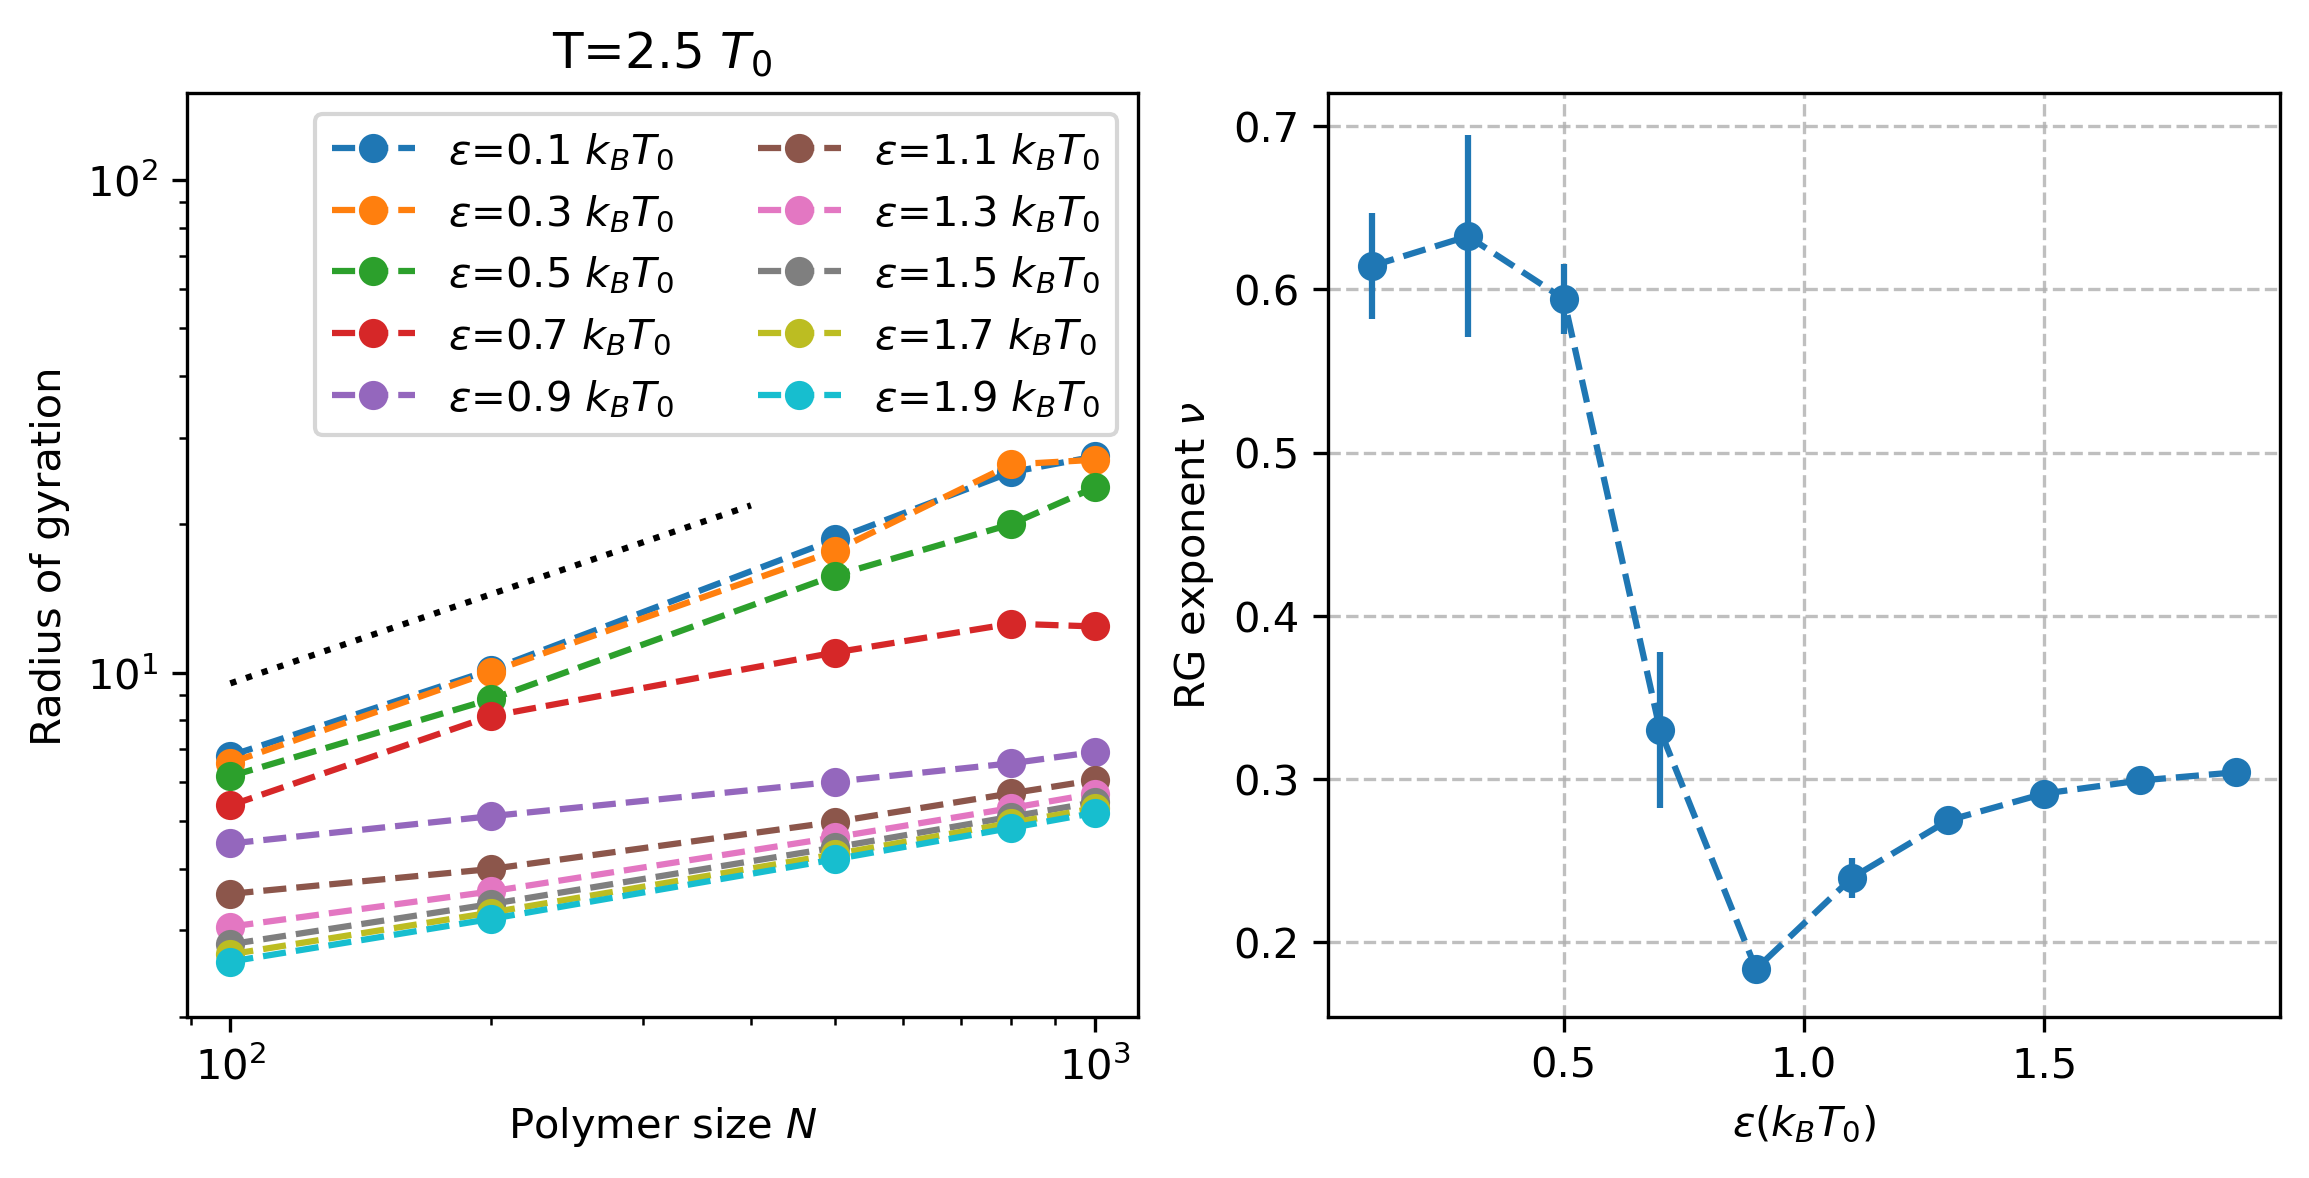

In [25]:
T=int(300)
Nvals = np.logspace(1.5,3.5,10)
fig, ax = plt.subplots(1,2, figsize=(9,4), dpi=300)
nu={0.0:[[],[]]}
chivals=[]
for chi in sorted(Rg.keys()):
    ax[0].loglog(np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1],'o--', label=f"$\\epsilon$={chi:.1f} $k_BT_0$")
    
    popt,pcov = curve_fit(fit_fn,np.array(Rg[chi][T])[0],np.array(Rg[chi][T])[1])
    print(popt,pcov[1][1], np.sqrt(pcov[1,1]))
    nu[0.0][0].append(popt[1])
    nu[0.0][1].append(np.sqrt(pcov[1,1]))
    chivals.append(chi)

ax[0].set_title("T=2.5 $T_0$")
ax[0].plot([100,400], 0.6*np.array([100,400])**0.6, 'k:')
ax[0].legend(ncols=2)
ax[0].set_ylim(2,150)
ax[0].set_ylabel("Radius of gyration")
ax[0].set_xlabel("Polymer size $N$")
ax[1].errorbar(np.array(chivals), nu[0.0][0], yerr=nu[0.0][1], fmt='o--')
ax[1].set_xlabel("$\\epsilon (k_BT_0)$")
ax[1].set_ylabel("RG exponent $\\nu$")
ax[1].grid(alpha=0.8, which='both', ls='--')


# ax[1].set_ylim(0.,1)


In [22]:
300/120

2.5

# Force extended globule

## Simulations

In [1]:
from pathlib import Path
import os
# SRC='/home/sb95/ChromatinDynamics/src'
SRC = os.path.join(Path.cwd().parent,'src')
print(SRC)

/Users/sb95/Library/CloudStorage/Box-Box/Research_current/ChromatinDynamics/src


In [23]:
import sys
sys.path.append(SRC)
from Topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
import openmm.unit as unit
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
generator = TopologyGenerator()
generator.gen_top([500])


In [261]:
sim = ChromatinDynamics(
        topology=generator.topology,
        platform_name="OpenCL", 
        name=f'test',
        output_dir=f"output",
        console_stream=True,
        )


2025-04-13 13:28:38,359 | INFO | ChromatinDynamics | ************************************************************
2025-04-13 13:28:38,361 | INFO | ChromatinDynamics |                      Chromatin Dynamics                     
2025-04-13 13:28:38,361 | INFO | ChromatinDynamics | ************************************************************
2025-04-13 13:28:38,362 | INFO | ChromatinDynamics | Storing output in output
2025-04-13 13:28:38,363 | INFO | ChromatinDynamics | System initialized with 500 particles.
2025-04-13 13:28:38,364 | INFO | Platforms | Platform 'OpenCL' is available and selected.
2025-04-13 13:28:38,364 | INFO | ChromatinDynamics | force_field_manager initialized. Use this to add forces to the system before setting up simulation.
2025-04-13 13:28:38,365 | INFO | ChromatinDynamics | ------------------------------------------------------------


In [262]:
sim.force_field_manager.add_harmonic_bonds(k=200.0, r0=1.0, group=0)
sim.force_field_manager.add_lennard_jones_force(epsilon=1.0, sigma=1.0, group=1)
sim.force_field_manager.constrain_monomer_pos(mono_id=0, pos=[0.0,0.0,0.0], group=2, k=200.0)
# sim.force_field_manager.constrain_monomer_pos(mono_id=sim.num_particles-1, pos=[0.0,0.0,80.0], group=2, k=10.0)
sim.force_field_manager.apply_force_z_axis(mono_id=sim.num_particles-1, fz=5.0, group=3)


2025-04-13 13:28:43,472 | INFO | Forcefield | Adding 499 harmonic bonds with parameters:
2025-04-13 13:28:43,473 | INFO | Forcefield | length: 1.0, spring constant (k): 200.0, group: 0
2025-04-13 13:28:43,474 | INFO | Forcefield | HarmonicBonds force successfully added to system.
2025-04-13 13:28:43,474 | INFO | Forcefield | --------------------------------------------------
2025-04-13 13:28:43,475 | INFO | Forcefield | Adding Lennard-Jones force:
2025-04-13 13:28:43,476 | INFO | Forcefield | epsilon=1.0, sigma=1.0, cutoff=5.0, group=1
2025-04-13 13:28:43,477 | INFO | Forcefield | Added exclusions from bonded monomers.
2025-04-13 13:28:43,478 | INFO | Forcefield | LennardJones force successfully added to system.
2025-04-13 13:28:43,478 | INFO | Forcefield | --------------------------------------------------
2025-04-13 13:28:43,479 | INFO | Forcefield | MonoPosConstraint force successfully added to system.
2025-04-13 13:28:43,479 | INFO | Forcefield | -----------------------------------

In [263]:
    
sim.simulation_setup(
    init_struct='saw3d',
    integrator='langevin',
    temperature=120.0,
    timestep=0.001,
    save_pos=True,
    save_energy=True,
    energy_report_interval=1000,  
    pos_report_interval=10_000,              
    )


2025-04-13 13:28:45,822 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:45,823 | INFO | Integrators | Valid integrators: ['langevin', 'brownian', 'active-brownian']| Selected: langevin
2025-04-13 13:28:45,824 | INFO | Integrators | LangevinIntegrator: temperatute=120.0 | friction=0.1 | timestep=0.001
2025-04-13 13:28:45,844 | INFO | ChromatinDynamics | Setting up context...
2025-04-13 13:28:45,851 | INFO | Utilities | 3D SAW created after 1 attempt(s). Position shape: (500, 3)
2025-04-13 13:28:45,853 | INFO | ChromatinDynamics | Simulation set up complete!
2025-04-13 13:28:45,854 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-04-13 13:28:45,854 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-04-13 13:28:45,855

In [264]:
sim.pos_reporter.pause()
sim.run(50_000) #equilibrate and dont save rg
sim.pos_reporter.resume()
sim.print_force_info()


2025-04-13 13:28:47,536 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:47,537 | INFO | ChromatinDynamics | Running simulation for 50000 steps...
2025-04-13 13:28:51,921 | INFO | ChromatinDynamics | Completed 50000 steps in 4.38s (11406 steps/s)
2025-04-13 13:28:51,922 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:51,922 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-04-13 13:28:51,923 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-04-13 13:28:51,923 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-04-13 13:28:51,924 | INFO | ChromatinDynamics |

In [265]:
for _ in range(100):
    sim.run(10_000)
        
sim.pos_reporter.close()

2025-04-13 13:28:57,177 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:57,178 | INFO | ChromatinDynamics | Running simulation for 10000 steps...
2025-04-13 13:28:58,098 | INFO | ChromatinDynamics | Completed 10000 steps in 0.92s (10879 steps/s)
2025-04-13 13:28:58,098 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:58,099 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:58,099 | INFO | ChromatinDynamics | Running simulation for 10000 steps...
2025-04-13 13:28:58,963 | INFO | ChromatinDynamics | Completed 10000 steps in 0.86s (11588 steps/s)
2025-04-13 13:28:58,963 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:58,963 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-13 13:28:58,964 | INFO | ChromatinDynami

In [266]:
pos = h5py.File('output/test_positions.cndb','r')
pos.keys()

<KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']>

18


(0.0, 80.0)

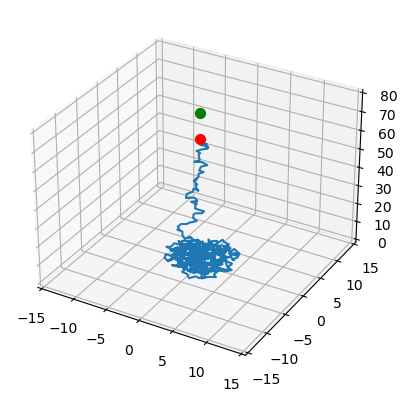

In [361]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=str(np.random.randint(0,99))
print(n)
ax.plot(pos[n][:,0], pos[n][:,1], pos[n][:,2])
ax.scatter(pos[n][-1,0], pos[n][-1,1], pos[n][-1,2], 'o', s=50, c='r')
ax.scatter(0, 0, 80, 'o', s=50, c='g')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(0,80)

## Analysis

In [ ]:
ext_vals_mean={}
ext_vals_sd = {}
ext_vals={}
fz_vals={}
for temp in [120, ]:
    for mm, path in enumerate([f"/work/cms16/sb95/SAW_globule_extension_const_force_stiffk10.0/epsilon_1.0/temp_{temp}/N_500/",
                 f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_{temp}/N_500/"]):
        ext_vals_mean[mm][temp]={}
        ext_vals_sd[mm][temp]={}
        ext_vals[mm][temp]={}
        fz_vals[mm][temp]={}
        for ii, val in enumerate(sorted(os.listdir(path))):
            fz = float(val.split("fz")[-1])
            # print(val,fz)
            fz_vals[mm][temp].append(fz)
            ext_vals[mm][temp].append([])
            r_ee = []
            rg = []
            for val1 in os.listdir(f"/work/cms16/sb95/SAW_globule_extension_const_force/epsilon_1.0/temp_{temp}/N_500/"+val):
                try:
                    if 'energy_report' in val1:
                        rg_val = np.loadtxt(f"/work/cms16/sb95/SAW_globule_extension_const_force/epsilon_1.0/temp_{temp}/N_500/"+val+'/'+val1, skiprows=1, usecols=[2])
                        if (sum(rg_val>500))>0:
                            print('problem')
                            continue
                        rg.append(rg_val.mean())
                        
                    elif 'positions' in val1:
                        # print(val1)
                        with h5py.File(f"/work/cms16/sb95/SAW_globule_extension_const_force/epsilon_1.0/temp_{temp}/N_500/"+val+'/'+val1, 'r') as pos:
                            # print(pos.keys())   
                            for key in pos.keys():
                                dist = np.linalg.norm(np.array(pos[key])[0]-np.array(pos[key])[-1])
                                # dist = np.array(pos[key])[0]
                                if dist>500: continue
                                r_ee.append(dist)
                                ext_vals[mm][temp][ii].append(dist)
                                # print(dist)
                except(BlockingIOError): 
                    print(val1)
                    pass                        
                
            ext_vals_mean[mm][temp].append(np.mean(r_ee))
            ext_vals_sd[mm][temp].append(np.std(r_ee))
            print(fz, np.mean(r_ee), np.std(r_ee), np.mean(rg),)

        # plt.errorbar(fz_vals, np.array(ext_vals_mean)/500.0, yerr=np.array(ext_vals_sd)/500.0, fmt='o-', capsize=2)
        # plt.plot(fz_vals, [np.mean(xx) for xx in ext_vals], 'x')
                        

KeyError: 0

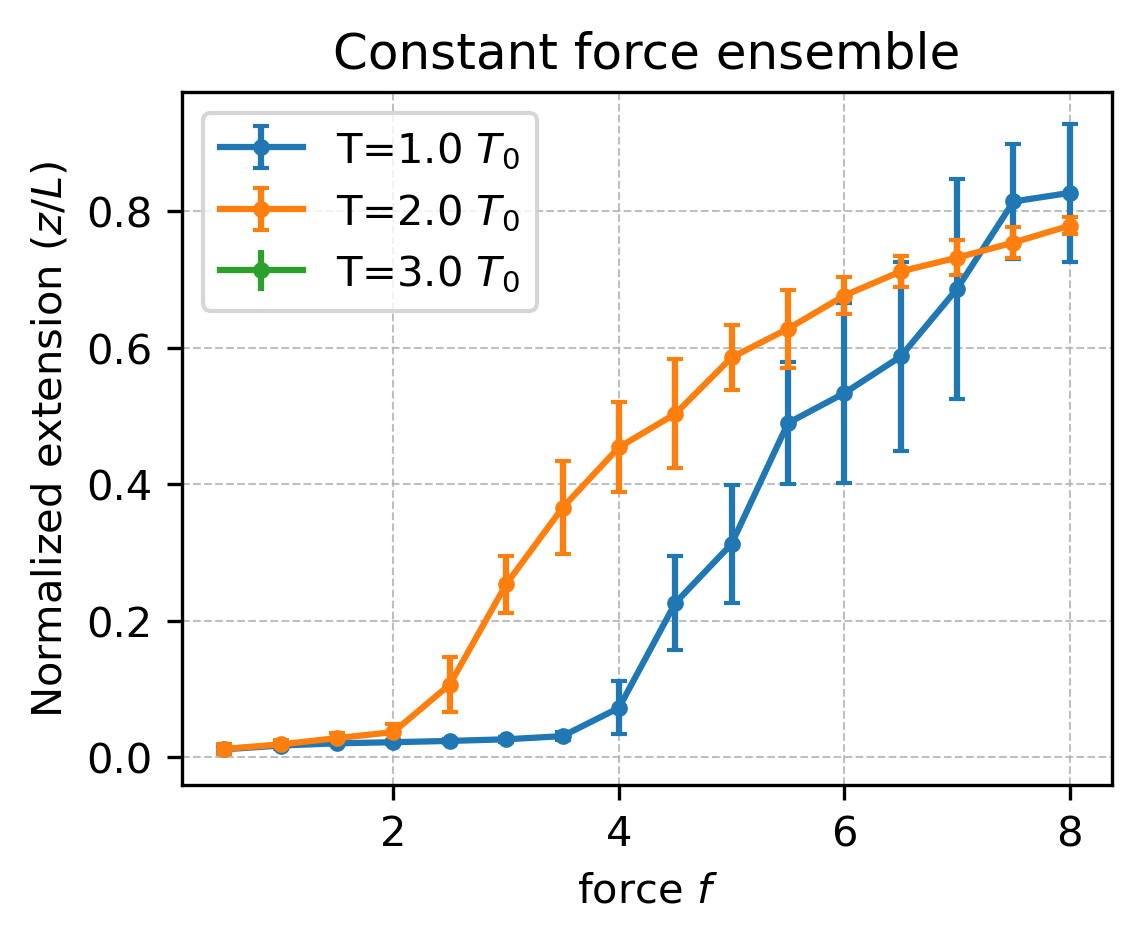

In [111]:
fig,ax=plt.subplots(1,1, figsize=(4,3), dpi=300)
for temp in ext_vals_mean.keys():
    ax.errorbar(fz_vals[temp], np.array(ext_vals_mean[temp])/500.0, yerr=np.array(ext_vals_sd[temp])/500.0, fmt='.-', capsize=2, label=f"T={temp/120.0:.1f} $T_0$")
ax.legend()
ax.set_xlabel("force $f$")
ax.set_ylabel("Normalized extension ($z/L$)")
ax.set_title("Constant force ensemble")
# ax.set_yscale('log')
ax.grid(alpha=0.8, lw=0.5, ls='--', which='both')


In [123]:
zext_vals_mean={}
zext_vals_sd = {}
zext_vals={}
fz_vals_m={}
fz_vals_sd={}

for temp in [120,]:
    for mm, path in enumerate([f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1_stiffk10.0/epsilon_1.0/temp_{temp}/N_500/",
                 f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_{temp}/N_500/"]):
        fz_vals_m[mm] = {}
        fz_vals_sd[mm] = {}
        zext_vals_mean[mm] = {}
        zext_vals_sd[mm] = {}
        zext_vals[mm] = {}
        
        fz_vals_m[mm][temp] = []
        fz_vals_sd[mm][temp] = []
        zext_vals_mean[mm][temp]=[]
        zext_vals_sd[mm][temp] = []
        zext_vals[mm][temp]=[]
        # path=f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1_stiffk10.0/epsilon_1.0/temp_{temp}/N_500/"
        for ii, val in enumerate(sorted(os.listdir(path), key=lambda x: float(x.split("z")[-1]))):
            z = float(val.split("z")[-1])
            # print(val,z)
            # fz_vals[temp].append(z)
            zext_vals[mm][temp].append([])
            r_ee = []
            rg = []
            zspr=[]
            for val1 in os.listdir(path+val):
                try:
                    if 'energy_report' in val1:
                        rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
                        if (sum(rg_val>300))>0:
                            print(val1)
                            continue
                        rg.append(rg_val.mean())
                        
                    elif 'positions' in val1:
                        # print(val1)
                        with h5py.File(path+val+'/'+val1, 'r') as pos:
                            # print(pos.keys())   
                            for key in pos.keys():
                                # dist = np.linalg.norm(np.array([0,0,z])-np.array(pos[key])[-1])
                                dist=z-np.array(pos[key])[-1][2]
                                if dist>100: 
                                    print(val1)
                                    continue
                                r_ee.append(np.linalg.norm(np.array(pos[key])[0]-np.array(pos[key])[-1]))
                                zspr.append(dist)
                                zext_vals[mm][temp][ii].append(dist)
                                # print(dist)
                except(BlockingIOError, OSError): pass                    
            fz_vals_m[mm][temp].append(np.mean(zspr))
            fz_vals_sd[mm][temp].append(np.std(zspr))
            zext_vals_mean[mm][temp].append(np.mean(r_ee))
            zext_vals_sd[mm][temp].append(np.std(r_ee))
        print(z, np.mean(r_ee), np.std(r_ee), np.mean(rg),)
                        

/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1_stiffk10.0/epsilon_1.0/temp_120/N_500/z10.0/polymer_7_energy_report.txt"
  rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
/tmp/ipykernel_31525/1510045144.py:37: RuntimeWarning: Mean of empty slice.
  rg.append(rg_val.mean())
/work/cms16/sb95/anaconda3/envs/openmm_work/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1_stiffk10.0/epsilon_1.0/temp_120/N_500/z20.0/polymer_7_energy_report.txt"
  rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1

500.0 465.8120196127328 3.979506448662707 135.2642488235294


/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_120/N_500/z10.0/polymer_0_energy_report.txt"
  rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_120/N_500/z30.0/polymer_0_energy_report.txt"
  rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_120/N_500/z40.0/polymer_0_energy_report.txt"
  rg_val = np.loadtxt(path+val+'/'+val1, skiprows=1, usecols=[2])
/tmp/ipykernel_31525/1510045144.py:33: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_120/N_500/z150.0/polymer_0_energy_r

500.0 433.17220442600166 2.4911369526392817 125.31167083333332


0 120


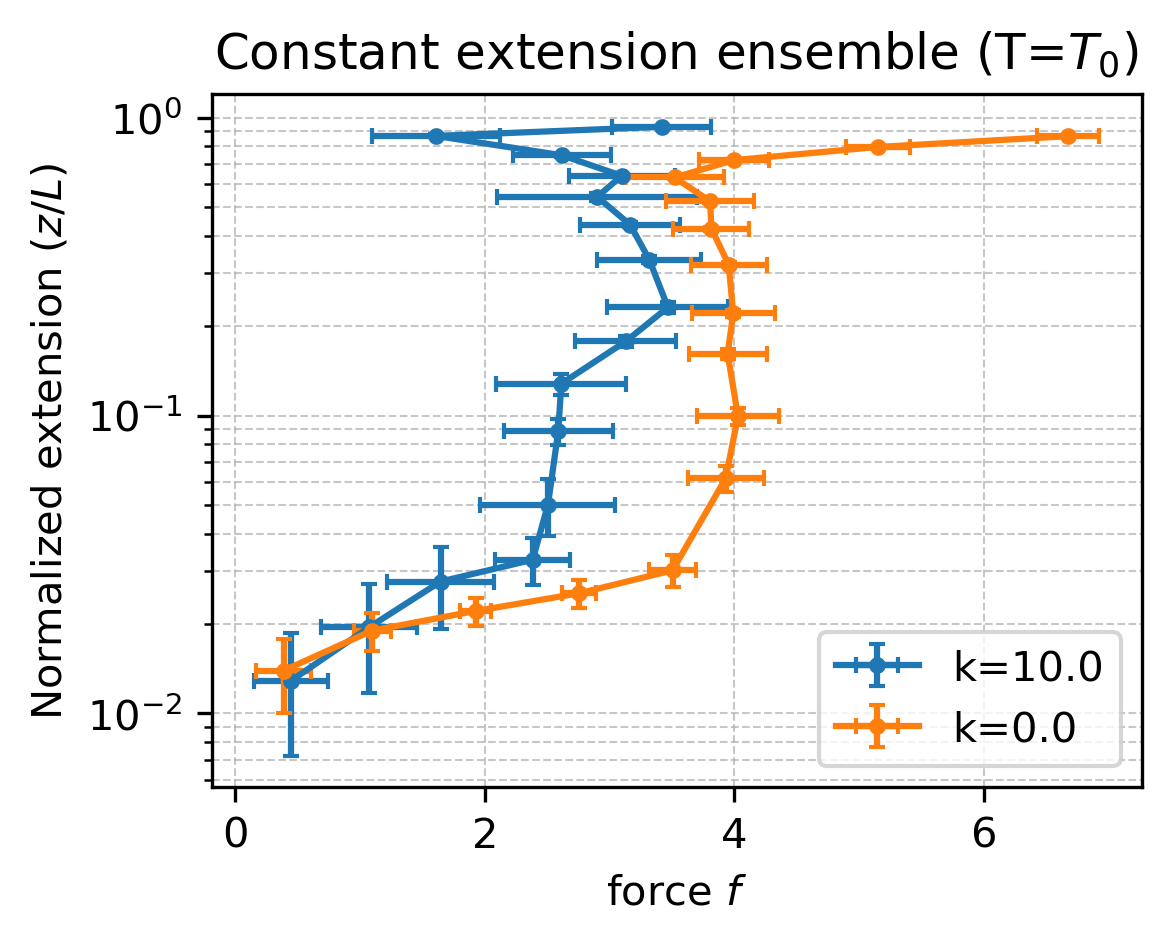

In [125]:
fig,ax=plt.subplots(1,1, figsize=(4,3), dpi=300)
k=['k=10.0', 'k=0.0']
for ii, temp in enumerate(zext_vals_mean[0].keys()):
    print(ii, temp)
    # ax.errorbar(np.array(fz_vals_m[0][temp])*0.1, np.array(zext_vals_mean[0][temp])/500.0, 
    #             yerr=np.array(zext_vals_sd[0][temp])/500.0, xerr=np.array(fz_vals_sd[0][temp])*0.1,
    #             fmt='.-', capsize=2, label=f"T={temp/120.0:.1f} $T_0$", zorder=7-ii)
    # ax.errorbar(np.array(fz_vals_m[1][temp])*0.1, np.array(zext_vals_mean[1][temp])/500.0, 
    #             yerr=np.array(zext_vals_sd[1][temp])/500.0, xerr=np.array(fz_vals_sd[1][temp])*0.1,
    #             fmt='.-', capsize=2, label=f"T={temp/120.0:.1f} $T_0$", zorder=7-ii)
    ax.errorbar(np.array(fz_vals_m[0][temp])*0.1, np.array(zext_vals_mean[0][temp])/500.0, 
                yerr=np.array(zext_vals_sd[0][temp])/500.0, xerr=np.array(fz_vals_sd[0][temp])*0.1,
                fmt='.-', capsize=2, label=k[0], zorder=7-ii)
    ax.errorbar(np.array(fz_vals_m[1][temp])*0.1, np.array(zext_vals_mean[1][temp])/500.0, 
                yerr=np.array(zext_vals_sd[1][temp])/500.0, xerr=np.array(fz_vals_sd[1][temp])*0.1,
                fmt='.-', capsize=2, label=k[1], zorder=7-ii)
ax.legend()
ax.set_xlabel("force $f$")
ax.set_ylabel("Normalized extension ($z/L$)")
ax.set_title("Constant extension ensemble (T=$T_0$)")
ax.grid(alpha=0.7, lw=0.5, ls='--', which='both')
# ax.plot([5,10], 0.1*np.array([5,10])**(0.5), 'k--')
# ax.plot([1,4], 0.1*np.array([1,4])**(1), 'k--')
ax.set_yscale('log')
# plt.errorbar(z_vals, zext_vals_mean, yerr=zext_vals_sd)
# plt.errorbar(z_vals, np.array(zext_vals_mean)*20.0,yerr=np.array(zext_vals_sd)*20)

In [98]:
z=150.0
T=120
fz=2.7
path=f"/work/cms16/sb95/SAW_globule_extension_const_ext_k0.1/epsilon_1.0/temp_{T}/N_500/z{z}/polymer_9_positions.cndb"
# path=f"/work/cms16/sb95/SAW_globule_extension_const_force/epsilon_1.0/temp_{T}/N_500/fz{fz}/polymer_3_positions.cndb"
pos = h5py.File(path,'r')
pos.keys()
data=[]
for key in pos.keys():
    data.append(pos[key])
data=np.array(data)
data.shape

(40, 500, 3)

30


Text(0.5, 0.92, 'T=1.0 $T_0$ ($z/L$=0.30)')

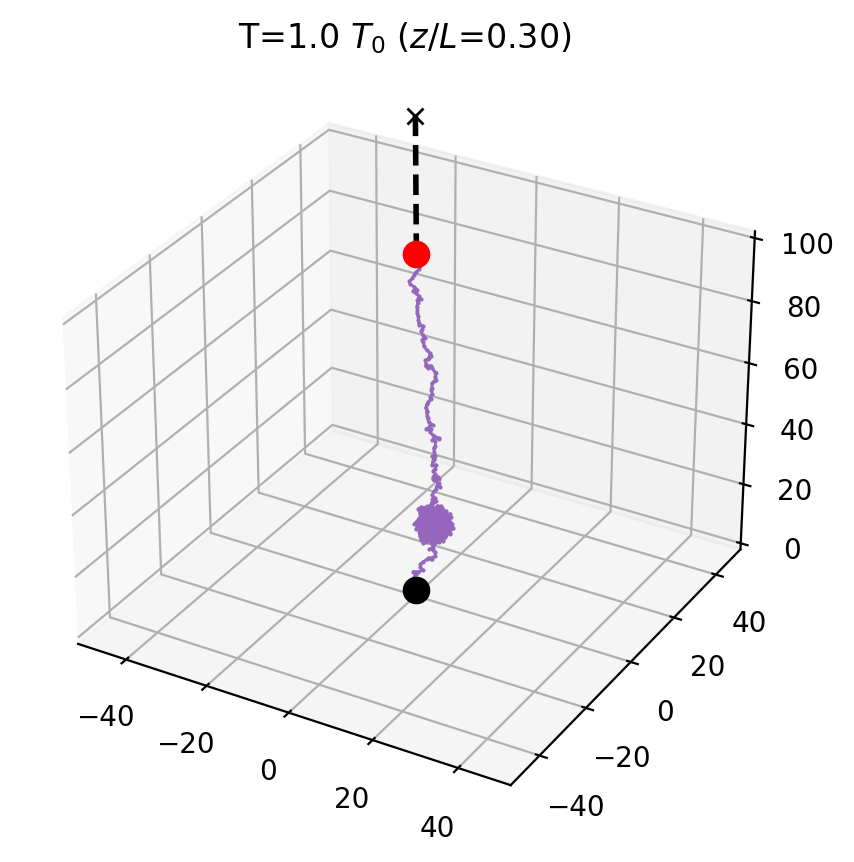

In [108]:

fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')
n=str(np.random.randint(0,len(pos.keys())))
print(n)
ax.plot(pos[n][:,0], pos[n][:,1], pos[n][:,2],'.-', lw=1,markersize=1, c='C4')
ax.scatter(pos[n][-1,0], pos[n][-1,1], pos[n][-1,2], 'o', s=80, c='r')
ax.scatter(pos[n][0,0], pos[n][0,1], pos[n][0,2], 'o', s=80, c='k')
ax.plot([0,pos[n][-1,0]], [0, pos[n][-1,1]], [z, pos[n][-1,2]], 'x--', c='k', lw=2)
d=z/3

ax.set_xlim(-d,d)
ax.set_ylim(-d,d)
ax.set_zlim(0,2*d)
ax.set_title(f"T={T/120.:.1f} $T_0$ ($z/L$={z/500.0:.2f})")
# ax.set_zlim(0,z)

In [9]:
data[39]

array([[-0.25532427,  0.04591875,  0.18120024],
       [ 0.53167588,  0.37179586,  0.15427731],
       [ 0.67440832, -0.59896231, -0.28205442],
       ...,
       [ 0.65066439, -0.13908188, 40.10113907],
       [-0.04198109,  0.70826203, 40.38221359],
       [-0.05968691, -0.16712895, 40.95389938]])

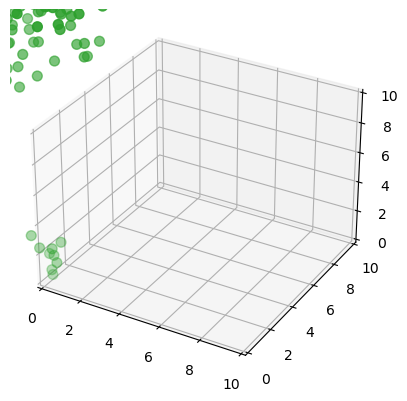

In [ ]:


# Save as GIF
anim.save("trajectory.gif", writer=PillowWriter(fps=10))

plt.close()  # Close figure if you don't want to display it in notebooks